<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/13%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1번 : 강의자료 예제 구현**

In [2]:
import numpy as np
from collections import Counter

data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]

def entropy(subset):
    labels = [row[-1] for row in subset]
    counts = Counter(labels)
    total = len(labels)
    ent = 0
    for count in counts.values():
        p = count / total
        ent -= p * np.log2(p)
    return ent

total_entropy = entropy(data)

def partition_by_attribute(data, index):
    partitions = {}
    for row in data:
        key = row[index]
        if key not in partitions:
            partitions[key] = []
        partitions[key].append(row)
    return partitions

def information_gain(data, index):
    subsets = partition_by_attribute(data, index)
    weighted_entropy = sum((len(subset)/len(data)) * entropy(subset) for subset in subsets.values())
    return entropy(data) - weighted_entropy

gain_outlook = information_gain(data, 0)

print("전체 엔트로피 H(D):", round(total_entropy, 3))
print("정보 이득 IG(D, Outlook):", round(gain_outlook, 3))

전체 엔트로피 H(D): 0.94
정보 이득 IG(D, Outlook): 0.247


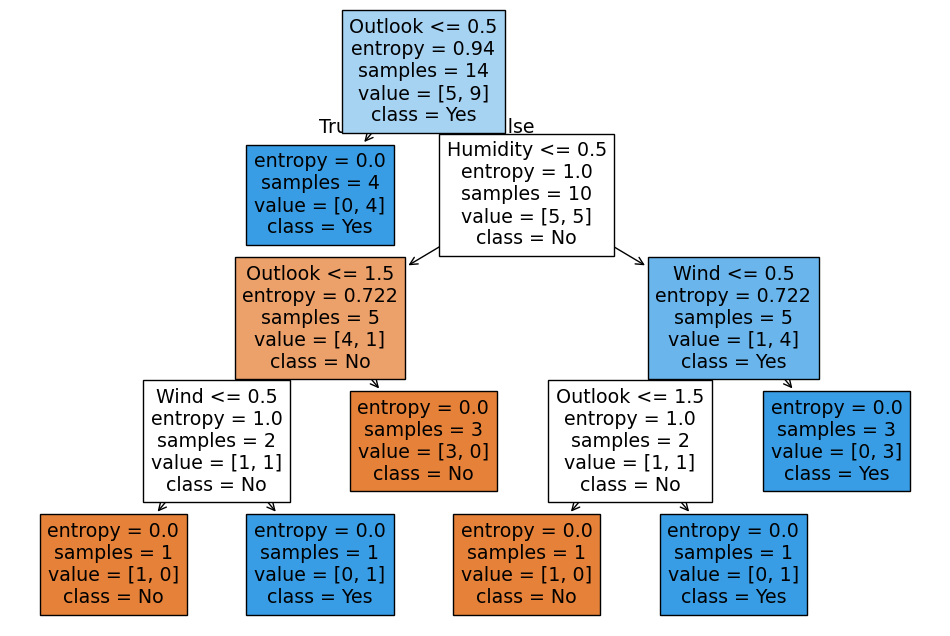

In [3]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns=["Outlook", "Temperature", "Humidity", "Wind", "Play"])

df_encoded = df.copy()
for col in ["Outlook", "Temperature", "Humidity", "Wind", "Play"]:
    df_encoded[col] = pd.Categorical(df[col]).codes

X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X, y)

plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

**2번**

<ipython-input-7-3098a43f4477>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
<ipython-input-7-3098a43f4477>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
<ipython-input-7-3098a43f4477>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.s

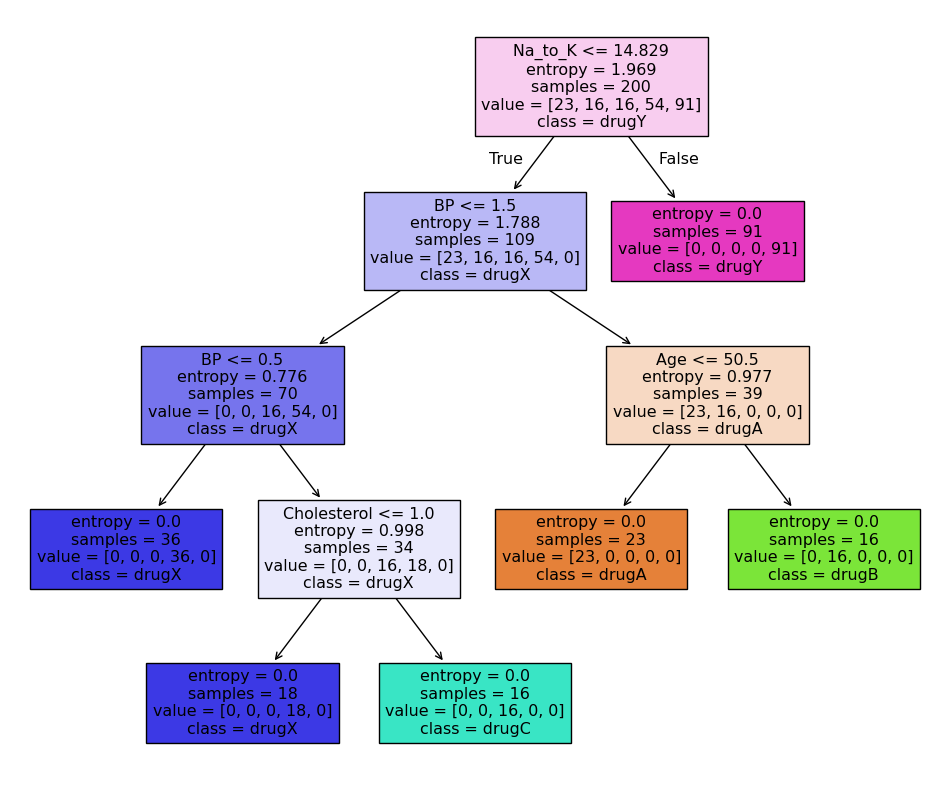

In [7]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/drug200.csv')

df['Sex'] = df['Sex'].replace({'F': 2, 'M': 1})
df['BP'] = df['BP'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Cholesterol'] = df['Cholesterol'].replace({'HIGH': 2, 'LOW': 1, 'NORMAL': 0})
df['Drug'] = df['Drug'].replace({'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'drugY': 5})

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']

clf = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf = clf.fit(X, y)

plt.figure(figsize=(12,10))
tree.plot_tree(clf,
               feature_names=X.columns,
               class_names=['drugA', 'drugB', 'drugC', 'drugX', 'drugY'],
               filled=True)
plt.show()